## **YData - Generate Synthetic Data**

In this quickstart example, we demonstrate how to generate synthetic data using a YData synthesizer. We show how to perform this task when the dataset is available through a YData data source or a Pandas dataframe.
<br />
For this example, we use the Adult Census Income dataset, which is a collection of census data from 1994 mainly used for prediction tasks (https://archive.ics.uci.edu/ml/datasets/adult).
<br />
Next to this notebook, you can find an example of a pipeline with the same name. It showcases how to run this notebook in a pipeline with a single step.

We first need to import the necessary YData packages. In this case, we also need a few additional imports to download de CSV file automatically.

In [1]:
from urllib import request
from pathlib import Path
import pandas as pd
from ydata.labs import DataSources
from ydata.metadata import Metadata
from ydata.dataset import Dataset
from ydata.synthesizers.regular.model import RegularSynthesizer
from ydata.report import SyntheticDataProfile

If the dataset is available in the YData Data Catalog, we can simply use the code snippet provided on the Dataset page to obtain the dataset and metadata objects.

In [2]:
datasource = DataSources.get(uid='{uid}', namespace='{namespace}')
dataset = datasource.dataset
metadata = datasource.metadata
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Alternatively, we can also create the dataset object from a Pandas dataframe. In this example, we automatically download the CSV file of the dataset and load it locally.

In [3]:
def get_census_dataset() -> pd.DataFrame:
    file_name = "census.csv"
    dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    file = Path(file_name)
    response = request.urlopen(dataset_url)
    file.write_bytes(response.read())

    df = pd.read_csv(file_name, header=None, index_col=False,
                     names=["age", "workclass", "fnlwgt",
                            "education", "education-num",
                            "marital-status", "occupation",
                            "relationship", "race", "sex",
                            "capital-gain", "capital-loss",
                            "hours-per-week", "native-country",
                            "income"])
    # Replace missing values
    df = df.replace("\\?", None, regex=True)
    return df

In [4]:
census_df = get_census_dataset()
dataset = Dataset(census_df)
metadata = Metadata(dataset)
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


To generate the synthetic data, we start by creating and training a YData Regular Synthesizer, which is designed for tabular data.

In [5]:
synthesizer = RegularSynthesizer()
synthesizer.fit(dataset, metadata=metadata)

INFO: 2023-06-07 14:10:32,810 [SYNTHESIZER] - Number columns considered for synth: 15
INFO: 2023-06-07 14:10:33,736 [SYNTHESIZER] - Starting the synthetic data modeling process over 1x1 blocks.
INFO: 2023-06-07 14:10:33,744 [SYNTHESIZER] - Preprocess segment
INFO: 2023-06-07 14:10:33,750 [SYNTHESIZER] - Synthesizer init.
INFO: 2023-06-07 14:10:33,751 [SYNTHESIZER] - Processing the data prior fitting the synthesizer.


After the training is complete, we can sample a new synthetic dataset by just providing the desired number of samples.

In [6]:
synth_dataset = synthesizer.sample(n_samples=dataset.nrows)
synth_dataset.head()

INFO: 2023-06-07 14:10:42,343 [SYNTHESIZER] - Start generating model samples.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,51,Private,136224,Assoc-voc,11,Divorced,Sales,Not-in-family,White,Male,0,0,45,United-States,<=50K
1,34,Private,189759,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,45,United-States,>50K
2,31,Self-emp-not-inc,235237,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K
3,48,Private,47686,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,26,Private,35917,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


Finally, to access the quality of the synthetic data we can generate the YData Quality Report, which includes a collection of metrics focused on fidelity, utility, and privacy. The report can be exported to a local PDF file.

INFO: 2023-06-07 14:10:52,617 [PROFILEREPORT] - Starting metrics calculation.
INFO: 2023-06-07 14:10:53,284 [PROFILEREPORT] - Synthetic data quality report selected target variable: None
INFO: 2023-06-07 14:10:53,285 [PROFILEREPORT] - preparing data format.
INFO: 2023-06-07 14:10:53,430 [PROFILEREPORT] - Preparing the data for metrics calculation
INFO: 2023-06-07 14:10:53,815 [PROFILEREPORT] - Calculating privacy metrics.
INFO: 2023-06-07 14:10:53,824 [PROFILEREPORT] - Calculating metric [Exact Matches].
INFO: 2023-06-07 14:10:54,357 [PROFILEREPORT] - Metric [Exact Matches] took 0.53s.
INFO: 2023-06-07 14:10:54,365 [PROFILEREPORT] - Calculating metric [Neighbours Privacy].
INFO: 2023-06-07 14:11:20,305 [PROFILEREPORT] - Metric [Neighbours Privacy] took 25.94s.
INFO: 2023-06-07 14:11:20,310 [PROFILEREPORT] - Calculating metric [Identifiability].
INFO: 2023-06-07 14:11:29,583 [PROFILEREPORT] - Metric [Identifiability] took 9.27s.
INFO: 2023-06-07 14:11:29,584 [PROFILEREPORT] - Calculatin

# Real data records: 33K
# Synthetic data records generated: 33K
# Columns: 15
Fidelity Score: 100%
Utility Score: 97%
Privacy Score: 71%


Correlation Similarity: 1.00
Distance Distribution: 1.00
Synthetic Classifier: 1.00
Mutual Information: 0.99
Missing Values Similarity: 1.00
Mean Similarity: 1.00
Std. Dev. Similarity: 1.00
Median Similarity: 1.00
Q25% Similarity: 1.00
Q75% Similarity: 1.00
Kolmogorov-Smirnov Test: 1.00
Total Variation Distance: 0.99
Category Coverage: 1.00
Missing Category Coverage: 0.96
Range Coverage: 1.00


QScore: 0.97


Exact Matches: 0.03
Neighbours Privacy: 0.76
Identifiability: 0.61


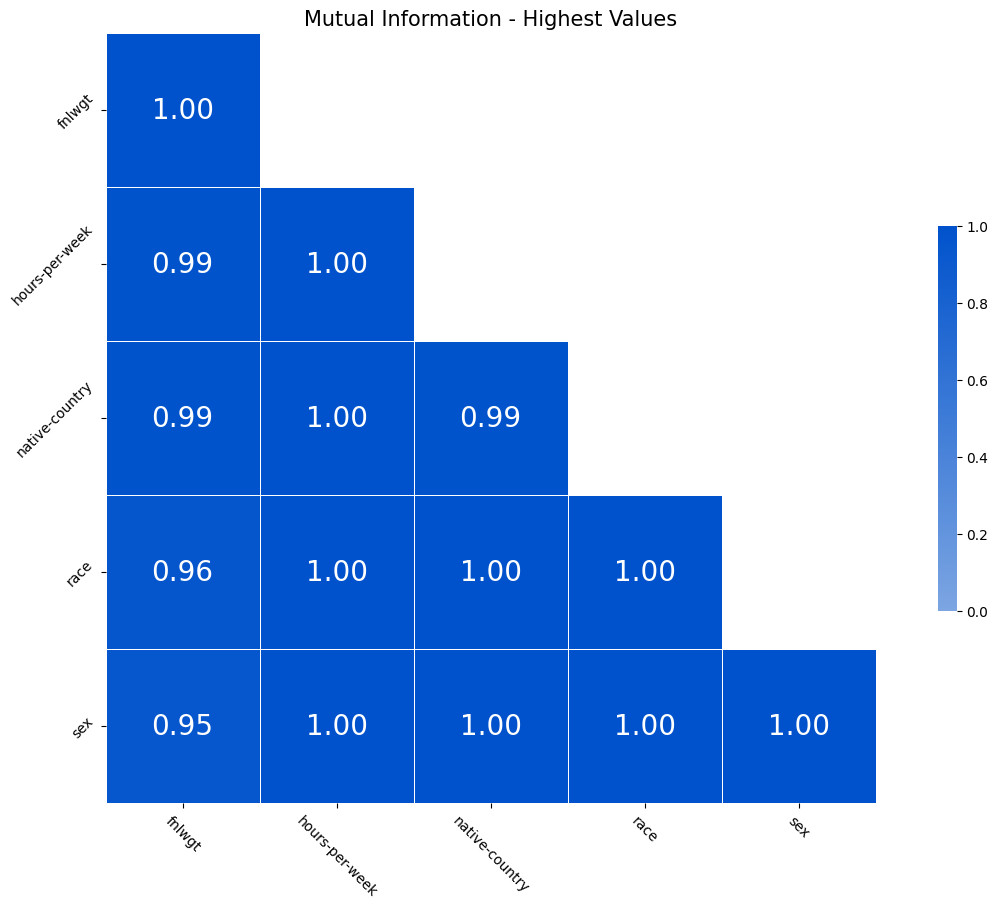

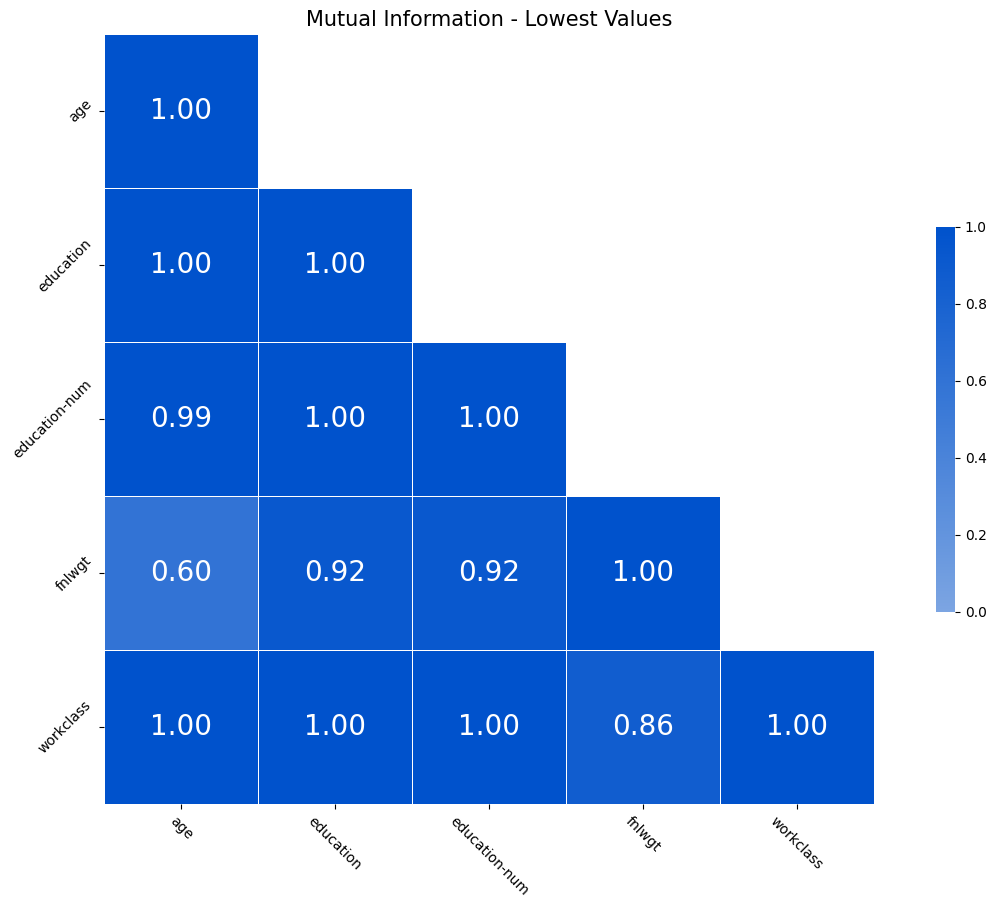

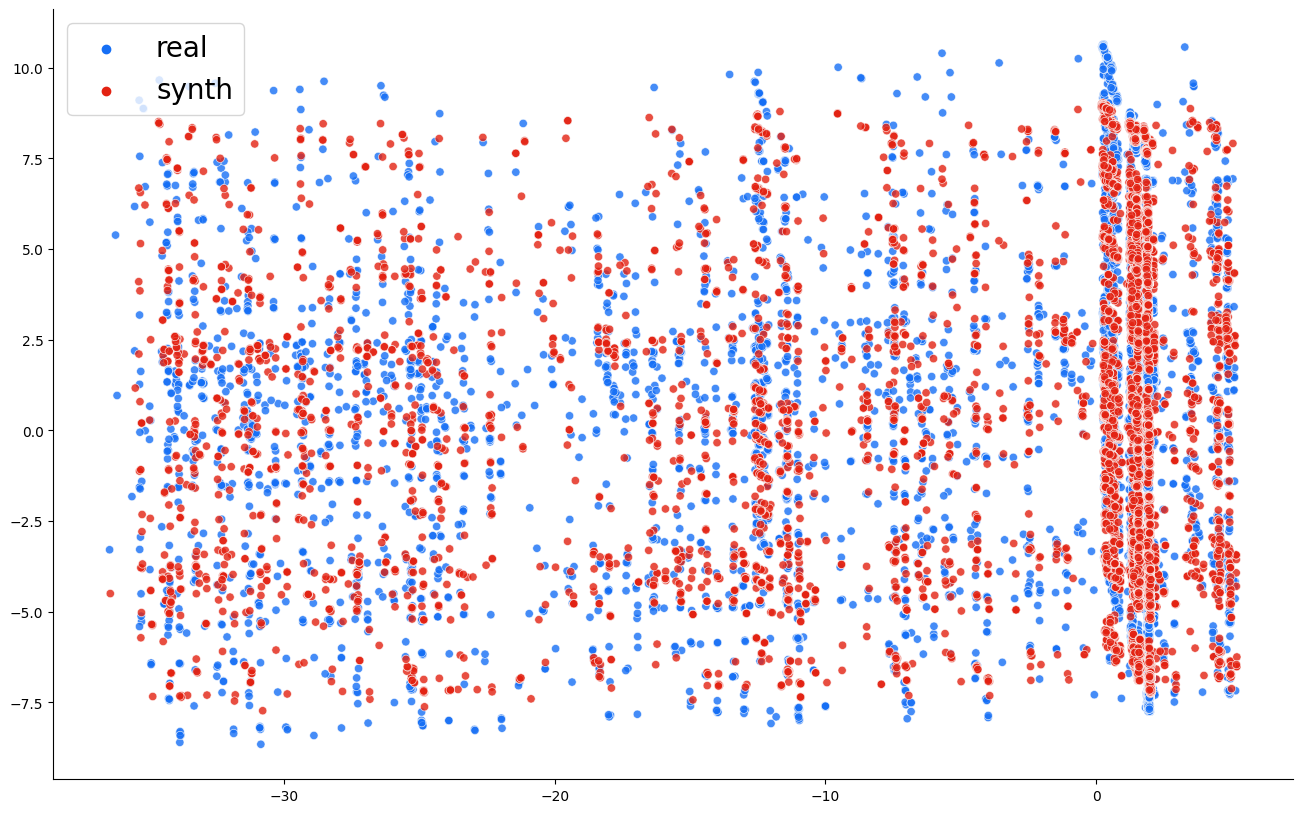

In [7]:
sdf = SyntheticDataProfile(real=dataset,
                           synth=synth_dataset,
                           metadata=metadata)

In [ ]:
sdf.generate_report("Census-YData-Report.pdf")